In [1]:
# load libraries
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(tidyr)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(patchwork)))
suppressWarnings(suppressPackageStartupMessages(library(ggsignif)))
# import ggplot theme
source("../../utils/figure_themes.r")

### Plot the variance and the levene test for each feature type

In [2]:
# set path to read the data
output_var_stats_path <- file.path("..","..","data","6.analysis_results","mean_aggregated_variance_results_feature_types_stats.csv")
output_var_path <- file.path("..","..","data","6.analysis_results","mean_aggregated_variance_results_feature_types.csv")
output_levene_path <- file.path("..","..","data","6.analysis_results","mean_aggregated_levene_test_results_feature_types.csv")
raw_features_path <- file.path("..","..","data", "5.converted_data","mean_aggregated_data.parquet")

# figures output path
fig_path <- file.path("..","figures","mean_aggregated")
# make the directory if it doesn't exist
if (!dir.exists(fig_path)){
  dir.create(fig_path, recursive = TRUE)
}

# read the data
variance_stats_df <- read.csv(output_var_stats_path)
variance_df <- read.csv(output_var_path)
levene_df <- read.csv(output_levene_path)
raw_features_df <- arrow::read_parquet(raw_features_path)
head(levene_df)
head(variance_df)
head(variance_stats_df)
head(raw_features_df)

,feature_group,levene_statistic,levene_p_value,group
,<chr>,<dbl>,<dbl>,<chr>
1,AreaShape,392.3232878,2.433017e-84,high_area_v_unsel_area
2,AreaShape,796.2481553,1.069709e-163,high_area_v_wt_area
3,AreaShape,36.5682298,1.573327e-09,unsel_area_v_wt_area
4,Intensity,65.3555991,2.227985e-15,high_intensity_v_unsel_intensity
5,Intensity,0.8348563,3.611348e-01,high_intensity_v_wt_intensity
6,Intensity,105.3576652,2.425428e-23,unsel_intensity_v_wt_intensity


,Metadata_genotype,variance,feature_group
,<chr>,<dbl>,<chr>
1,High-Severity,0.5167622,AreaShape
2,High-Severity,0.5167622,AreaShape
3,High-Severity,2.3610251,AreaShape
4,High-Severity,1.1471578,AreaShape
5,High-Severity,0.7160302,AreaShape
6,High-Severity,3.8559816,AreaShape


,Metadata_genotype,feature_group,variance_mean,variance_std,variance_max,variance_min,variance_count
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,High-Severity,AreaShape,0.7745877,0.6699700,3.8559816,4.588858e-06,98
2,High-Severity,Granularity,0.2781899,0.3579539,0.9811988,1.528730e-02,6
3,High-Severity,Intensity,0.5296292,0.2815652,1.1570140,1.290430e-01,15
4,High-Severity,Neighbors,0.7302378,0.2378980,0.9534235,4.799491e-01,3
5,High-Severity,RadialDistribution,0.6704045,0.4302949,1.7512192,0.000000e+00,70
6,High-Severity,Texture,0.3003150,0.2060772,0.7192168,3.230214e-02,52


Metadata_genotype,Metadata_replicate,Metadata_side,AreaShape_Area,AreaShape_CentralMoment_0_0,AreaShape_CentralMoment_0_1,AreaShape_CentralMoment_0_2,AreaShape_CentralMoment_0_3,AreaShape_CentralMoment_1_0,AreaShape_CentralMoment_1_1,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high,1,L,-0.1787974,-0.1787974,0.003557521,-0.3867965,0.2801180,0.037997585,0.4340460,⋯,-0.6277618,-0.6449902,-0.90335362,-0.8909394,-0.89699453,-0.90287010,-0.89614520,-0.89844840,-0.89887968,-0.89660930
high,1,R,1.3717630,1.3717630,0.538195037,0.2883216,0.5016182,4.163832754,-1.3619197,⋯,0.4195514,0.4069176,-0.18835794,-0.1591142,-0.18961488,-0.18630752,-0.21898136,-0.22575440,-0.21907311,-0.22513426
high,10,L,1.7062336,1.7062336,2.652373336,3.2804249,-1.9929659,0.184629766,-1.4043758,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
high,10,R,0.7716744,0.7716744,-1.332747275,0.1643035,0.2443713,0.173760455,-1.8851436,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
high,11,L,2.1808575,2.1808575,2.142685571,1.8380375,-0.0775148,0.008650445,0.8765967,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
high,11,R,2.0815568,2.0815568,-0.880954492,1.0149013,0.6606970,3.593763273,-1.4179216,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842


In [3]:
# convert the data to long format
# genotype - feature - value
# drop the replicate and side columns
raw_features_df_long <- raw_features_df %>%
  select(-c("Metadata_replicate", "Metadata_side")) %>%
  pivot_longer(cols = -c("Metadata_genotype"), names_to = "feature", values_to = "value")
# get the feature types by splitting the feature string
raw_features_df_long$feature_type <- sapply(strsplit(raw_features_df_long$feature, "_"), function(x) x[1])
# rename the genotypes
raw_features_df_long$Metadata_genotype <- factor(raw_features_df_long$Metadata_genotype, levels = c("high", "unsel", "wt"), labels = c("High-Severity", "Mid-Severity", "Wild Type"))
head(raw_features_df_long)


Metadata_genotype,feature,value,feature_type
<fct>,<chr>,<dbl>,<chr>
High-Severity,AreaShape_Area,-0.178797359,AreaShape
High-Severity,AreaShape_CentralMoment_0_0,-0.178797359,AreaShape
High-Severity,AreaShape_CentralMoment_0_1,0.003557521,AreaShape
High-Severity,AreaShape_CentralMoment_0_2,-0.386796484,AreaShape
High-Severity,AreaShape_CentralMoment_0_3,0.280117954,AreaShape
High-Severity,AreaShape_CentralMoment_1_0,0.037997585,AreaShape


In [4]:
# make a new column for ***
levene_df$significance <- ifelse(
    levene_df$levene_p_value < 0.001, "***", 
    ifelse(levene_df$levene_p_value < 0.01, "**", 
    ifelse(levene_df$levene_p_value < 0.05, "*", 
    "ns")
    )
)
head(levene_df)

,feature_group,levene_statistic,levene_p_value,group,significance
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,AreaShape,392.3232878,2.433017e-84,high_area_v_unsel_area,***
2,AreaShape,796.2481553,1.069709e-163,high_area_v_wt_area,***
3,AreaShape,36.5682298,1.573327e-09,unsel_area_v_wt_area,***
4,Intensity,65.3555991,2.227985e-15,high_intensity_v_unsel_intensity,***
5,Intensity,0.8348563,3.611348e-01,high_intensity_v_wt_intensity,ns
6,Intensity,105.3576652,2.425428e-23,unsel_intensity_v_wt_intensity,***


In [5]:
# split the levene_df into dfs for each feature group
levene_df_AreaShape <- levene_df %>% filter(feature_group == "AreaShape")
levene_df_Intensity <- levene_df %>% filter(feature_group == "Intensity")
levene_df_Granularity <- levene_df %>% filter(feature_group == "Granularity")
levene_df_Neighbors <- levene_df %>% filter(feature_group == "Neighbors")
levene_df_RadialDistribution <- levene_df %>% filter(feature_group == "RadialDistribution")

raw_features_df_long_AreaShape <- raw_features_df_long %>% filter(feature_type == "AreaShape")
raw_features_df_long_Intensity <- raw_features_df_long %>% filter(feature_type == "Intensity")
raw_features_df_long_Granularity <- raw_features_df_long %>% filter(feature_type == "Granularity")
raw_features_df_long_Neighbors <- raw_features_df_long %>% filter(feature_type == "Neighbors")
raw_features_df_long_RadialDistribution <- raw_features_df_long %>% filter(feature_type == "RadialDistribution")

variance_df_AreaShape <- variance_df %>% filter(feature_group == "AreaShape")
variance_df_Intensity <- variance_df %>% filter(feature_group == "Intensity")
variance_df_Granularity <- variance_df %>% filter(feature_group == "Granularity")
variance_df_Neighbors <- variance_df %>% filter(feature_group == "Neighbors")
variance_df_RadialDistribution <- variance_df %>% filter(feature_group == "RadialDistribution")


# split the variance_stats_df into dfs for each feature group
variance_stats_df_AreaShape <- variance_stats_df %>% filter(feature_group == "AreaShape")
variance_stats_df_Intensity <- variance_stats_df %>% filter(feature_group == "Intensity")
variance_stats_df_Granularity <- variance_stats_df %>% filter(feature_group == "Granularity")
variance_stats_df_Neighbors <- variance_stats_df %>% filter(feature_group == "Neighbors")
variance_stats_df_RadialDistribution <- variance_stats_df %>% filter(feature_group == "RadialDistribution")


## Max variance plots

In [6]:
head(variance_stats_df)
unique(variance_stats_df$Metadata_genotype)

,Metadata_genotype,feature_group,variance_mean,variance_std,variance_max,variance_min,variance_count
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,High-Severity,AreaShape,0.7745877,0.6699700,3.8559816,4.588858e-06,98
2,High-Severity,Granularity,0.2781899,0.3579539,0.9811988,1.528730e-02,6
3,High-Severity,Intensity,0.5296292,0.2815652,1.1570140,1.290430e-01,15
4,High-Severity,Neighbors,0.7302378,0.2378980,0.9534235,4.799491e-01,3
5,High-Severity,RadialDistribution,0.6704045,0.4302949,1.7512192,0.000000e+00,70
6,High-Severity,Texture,0.3003150,0.2060772,0.7192168,3.230214e-02,52


[1] "High-Severity" "Mid-Severity"  "Wild Type"

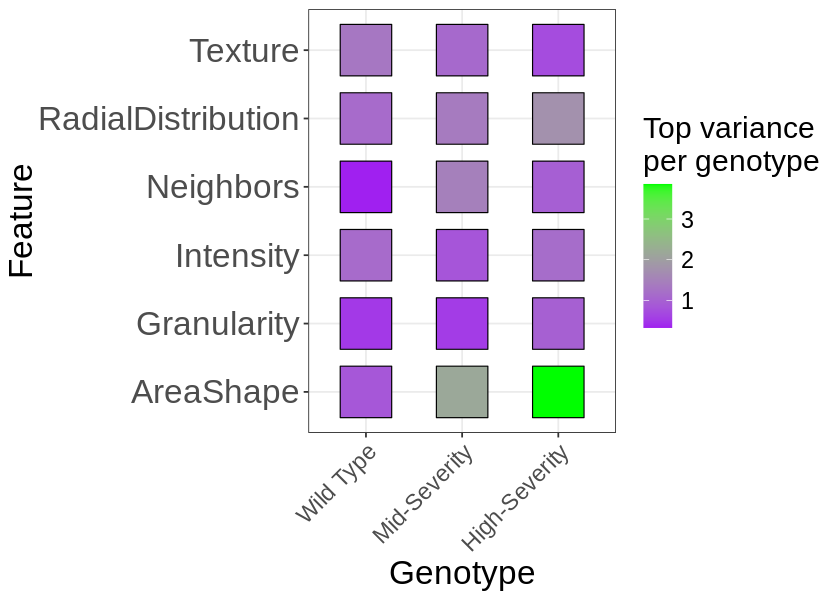

In [7]:
width <- 7
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# make genotypes and sides into factors
variance_stats_df$Metadata_genotype <- factor(variance_stats_df$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
coef_gg <- (
        ggplot(variance_stats_df, aes(x = Metadata_genotype, y = feature_group))
        + geom_point(aes(fill = abs(variance_max)), pch = 22, size = 16)
        + theme_bw()
        + scale_fill_continuous(
            name="Top variance \nper genotype",
            low = "purple",
            high = "green",
        )
        + xlab("Genotype")
        + ylab("Feature")
        
        + figure_theme
        + theme(
            axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        )
        # make legend text smaller
        + theme(legend.text=element_text(size=14))
        # rotate x axis labels
        + theme(axis.text.x = element_text(angle = 45, hjust = 1))
        + theme(plot.title = element_text(hjust = 0.5))
        )
coef_gg
# save the plot
ggsave(file="mean_aggregated_top_variance_per_genotype.png", plot=coef_gg, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)

## Variance plots with levene's test

### AreaShape boxplot

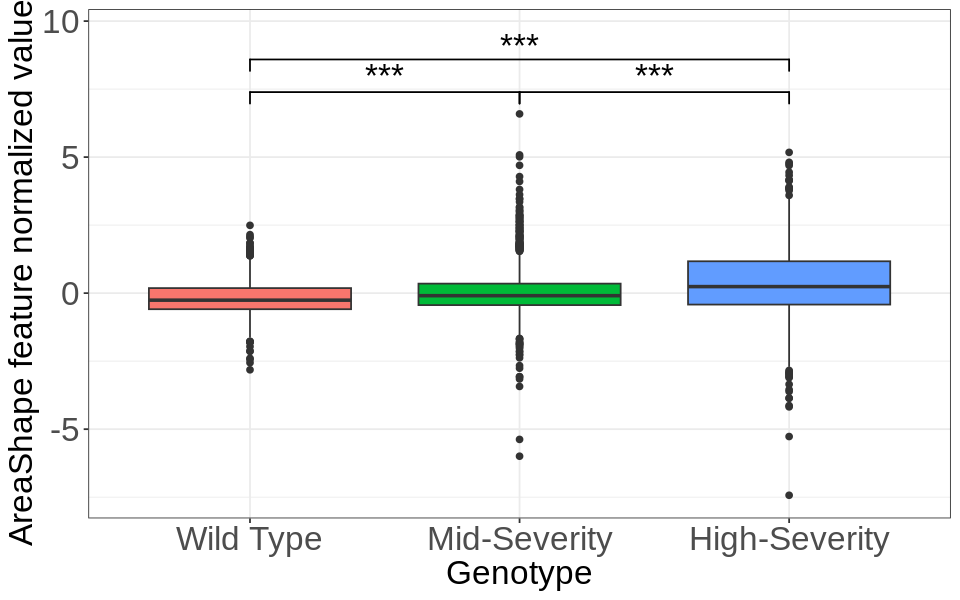

In [8]:
WT_vs_high_significance <- levene_df_AreaShape %>% filter(group == "high_area_v_wt_area")
WT_vs_unsel_significance <- levene_df_AreaShape %>% filter(group == "unsel_area_v_wt_area")
unsel_vs_high_significance <- levene_df_AreaShape %>% filter(group == "high_area_v_unsel_area")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
# make genotype a factor
raw_features_df_long_AreaShape$Metadata_genotype <- factor(raw_features_df_long_AreaShape$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
max_plot_value <- max(raw_features_df_long_AreaShape$value)
min_plot_value <- min(raw_features_df_long_AreaShape$value)
areashape_boxplot <- (
    ggplot(raw_features_df_long_AreaShape, aes(x = Metadata_genotype, y = value, fill = Metadata_genotype)) 
        + geom_boxplot()
        + labs(x = "Genotype", y = "AreaShape feature normalized values", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.5)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.25)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_plot_value+1.3, max_plot_value+1.5)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(min_plot_value,max_plot_value+3)
    )
areashape_boxplot
ggsave(file="mean_aggregated_normalized_feature_value_boxplot_across_genotype_AreaShape.png", plot=areashape_boxplot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)

### Areashape variance

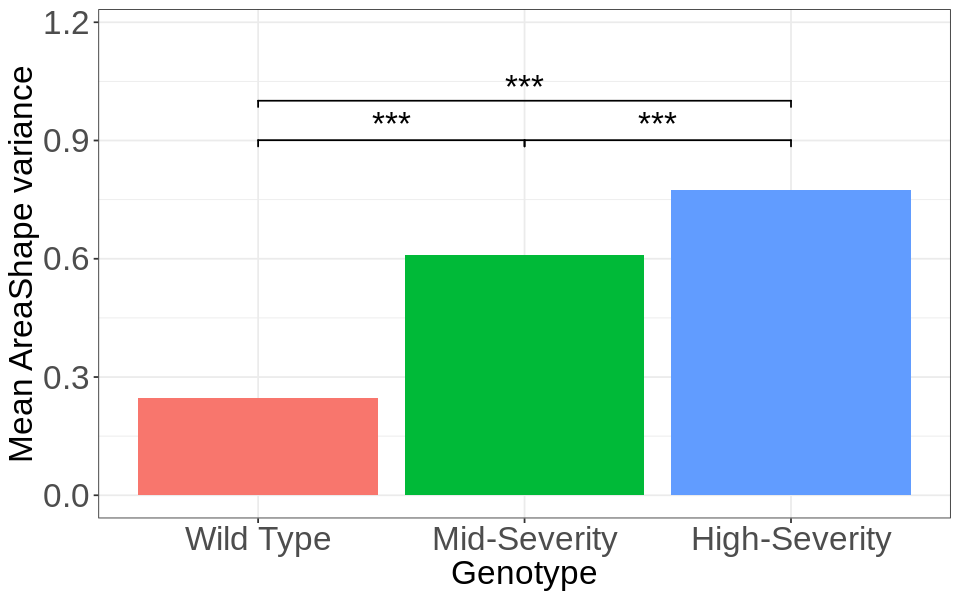

In [9]:
WT_vs_high_significance <- levene_df_AreaShape %>% filter(group == "high_area_v_wt_area")
WT_vs_unsel_significance <- levene_df_AreaShape %>% filter(group == "unsel_area_v_wt_area")
unsel_vs_high_significance <- levene_df_AreaShape %>% filter(group == "high_area_v_unsel_area")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
# make genotype a factor
variance_stats_df_AreaShape$Metadata_genotype <- factor(variance_stats_df_AreaShape$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

# get the max value of the variance
max_var <- max(variance_stats_df_AreaShape$variance_mean)
# add 0.3 to the max value to get the y max
max_var_plot <- max_var + 0.4
areashape_plot <- (
        ggplot(variance_stats_df_AreaShape, aes(x = Metadata_genotype, y = variance_mean, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + labs(x = "Genotype", y = "Mean AreaShape variance", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_var+0.2, max_var+0.25)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(0,max_var_plot)
    )
areashape_plot

ggsave(file="mean_aggregated_variance_across_genotype_AreaShape.png", plot=areashape_plot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)

### Intensity boxplot

[1] "ns"
[1] "***"
[1] "***"


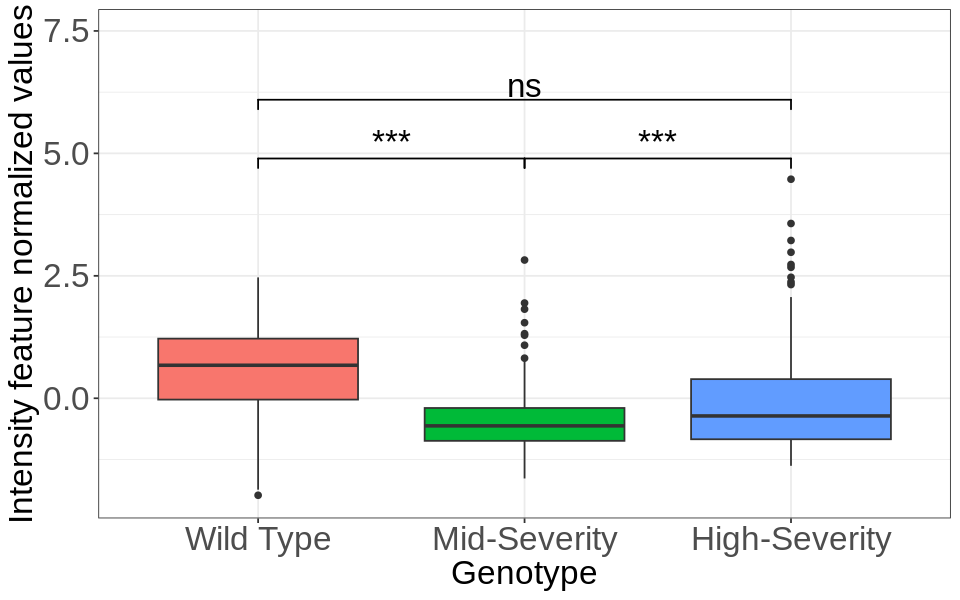

In [10]:
WT_vs_high_significance <- levene_df_Intensity %>% filter(group == "high_intensity_v_wt_intensity")
WT_vs_unsel_significance <- levene_df_Intensity %>% filter(group == "unsel_intensity_v_wt_intensity")
unsel_vs_high_significance <- levene_df_Intensity %>% filter(group == "high_intensity_v_unsel_intensity")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
print(WT_vs_high_significance)
print(WT_vs_unsel_significance)
print(unsel_vs_high_significance)
# make genotype a factor
raw_features_df_long_Intensity$Metadata_genotype <- factor(raw_features_df_long_Intensity$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
max_plot_value <- max(raw_features_df_long_Intensity$value)
min_plot_value <- min(raw_features_df_long_Intensity$value)
Intensity_boxplot <- (
    ggplot(raw_features_df_long_Intensity, aes(x = Metadata_genotype, y = value, fill = Metadata_genotype)) 
        + geom_boxplot()
        + labs(x = "Genotype", y = "Intensity feature normalized values", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.5)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.25)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_plot_value+1.3, max_plot_value+1.5)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(min_plot_value,max_plot_value+3)
    )
Intensity_boxplot
ggsave(file="mean_aggregated_normalized_feature_value_boxplot_across_genotype_Intensity.png", plot=Intensity_boxplot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)

### Intensity mean variance plot

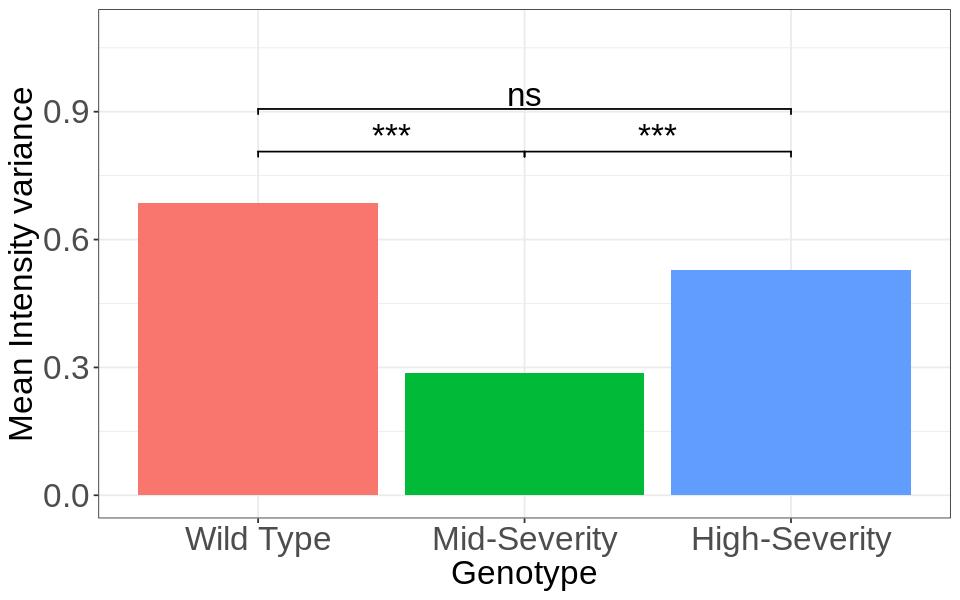

In [11]:
WT_vs_high_significance <- levene_df_Intensity %>% filter(group == "high_intensity_v_wt_intensity")
WT_vs_unsel_significance <- levene_df_Intensity %>% filter(group == "unsel_intensity_v_wt_intensity")
unsel_vs_high_significance <- levene_df_Intensity %>% filter(group == "high_intensity_v_unsel_intensity")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
# make genotype a factor
variance_stats_df_Intensity$Metadata_genotype <- factor(variance_stats_df_Intensity$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# get the max value of the variance
max_var <- max(variance_stats_df_Intensity$variance_mean)
# add 0.3 to the max value to get the y max
max_var_plot <- max_var + 0.4
intensity_plot <- (
        ggplot(variance_stats_df_Intensity, aes(x = Metadata_genotype, y = variance_mean, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + labs(x = "Genotype", y = "Mean Intensity variance", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_var+0.2, max_var+0.25)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(0,max_var_plot)
    )
intensity_plot
ggsave(file="mean_aggregated_variance_across_genotype_Intensity.png", plot=intensity_plot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)

### Granularity boxplot

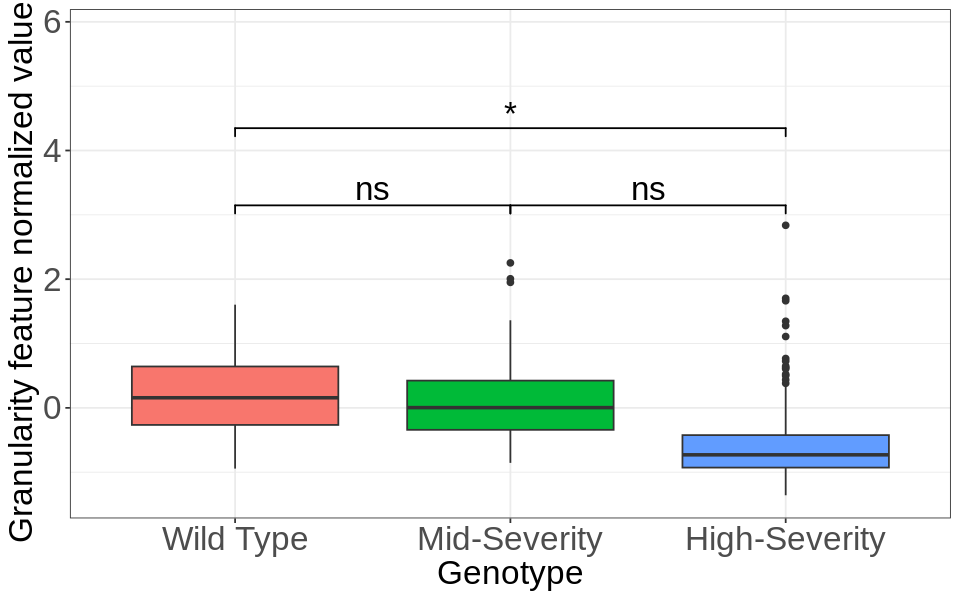

In [12]:
WT_vs_high_significance <- levene_df_Granularity %>% filter(group == "high_granularity_v_wt_granularity")
WT_vs_unsel_significance <- levene_df_Granularity %>% filter(group == "unsel_granularity_v_wt_granularity")
unsel_vs_high_significance <- levene_df_Granularity %>% filter(group == "high_granularity_v_unsel_granularity")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
# make genotype a factor
raw_features_df_long_Granularity$Metadata_genotype <- factor(raw_features_df_long_Granularity$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
max_plot_value <- max(raw_features_df_long_Granularity$value)
min_plot_value <- min(raw_features_df_long_Granularity$value)
Granularity_boxplot <- (
    ggplot(raw_features_df_long_Granularity, aes(x = Metadata_genotype, y = value, fill = Metadata_genotype)) 
        + geom_boxplot()
        + labs(x = "Genotype", y = "Granularity feature normalized values", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.5)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.25)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_plot_value+1.3, max_plot_value+1.5)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(min_plot_value,max_plot_value+3)
    )
Granularity_boxplot
ggsave(file="mean_aggregated_normalized_feature_value_boxplot_across_genotype_Granularity.png", plot=Granularity_boxplot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)

## Granularity mean variance plot

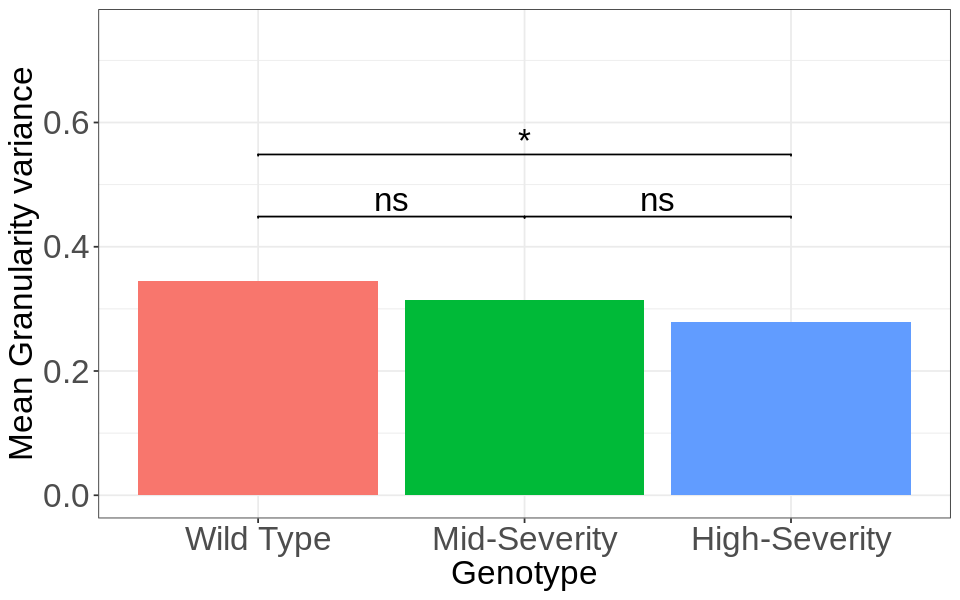

In [13]:
WT_vs_high_significance <- levene_df_Granularity %>% filter(group == "high_granularity_v_wt_granularity")
WT_vs_unsel_significance <- levene_df_Granularity %>% filter(group == "unsel_granularity_v_wt_granularity")
unsel_vs_high_significance <- levene_df_Granularity %>% filter(group == "high_granularity_v_unsel_granularity")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
# make genotype a factor
variance_stats_df_Granularity$Metadata_genotype <- factor(variance_stats_df_Granularity$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# get the max value of the variance
max_var <- max(variance_stats_df_Granularity$variance_mean)
# add 0.3 to the max value to get the y max
max_var_plot <- max_var + 0.4
granularity_plot <- (
        ggplot(variance_stats_df_Granularity, aes(x = Metadata_genotype, y = variance_mean, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + labs(x = "Genotype", y = "Mean Granularity variance", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_var+0.2, max_var+0.25)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(0,max_var_plot)
    )
granularity_plot
ggsave(file="mean_aggregated_mean_aggregated_variance_across_genotype_Granularity.png", plot=granularity_plot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)

### Neighbors boxplot

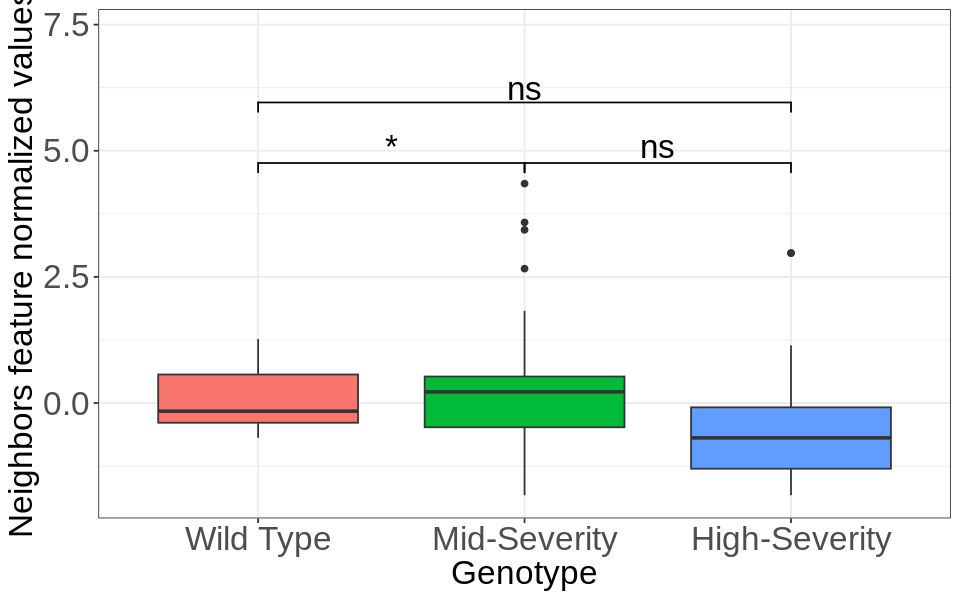

In [14]:
WT_vs_high_significance <- levene_df_Neighbors %>% filter(group == "high_neighbors_v_wt_neighbors")
WT_vs_unsel_significance <- levene_df_Neighbors %>% filter(group == "unsel_neighbors_v_wt_neighbors")
unsel_vs_high_significance <- levene_df_Neighbors %>% filter(group == "high_neighbors_v_unsel_neighbors")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
# make genotype a factor
raw_features_df_long_Neighbors$Metadata_genotype <- factor(raw_features_df_long_Neighbors$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
max_plot_value <- max(raw_features_df_long_Neighbors$value)
min_plot_value <- min(raw_features_df_long_Neighbors$value)
Neighbors_boxplot <- (
    ggplot(raw_features_df_long_Neighbors, aes(x = Metadata_genotype, y = value, fill = Metadata_genotype)) 
        + geom_boxplot()
        + labs(x = "Genotype", y = "Neighbors feature normalized values", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.5)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.25)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_plot_value+1.3, max_plot_value+1.5)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(min_plot_value,max_plot_value+3)
    )
Neighbors_boxplot
ggsave(file="mean_aggregated_normalized_feature_value_boxplot_across_genotype_Neighbors.png", plot=Neighbors_boxplot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)


## Neighbors mean variance plot

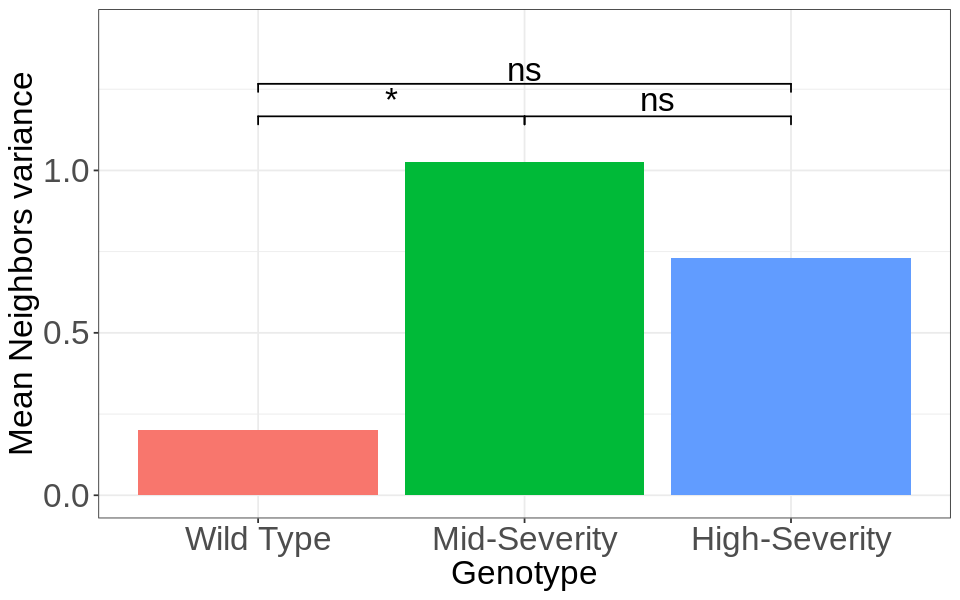

In [15]:
WT_vs_high_significance <- levene_df_Neighbors %>% filter(group == "high_neighbors_v_wt_neighbors")
WT_vs_unsel_significance <- levene_df_Neighbors %>% filter(group == "unsel_neighbors_v_wt_neighbors")
unsel_vs_high_significance <- levene_df_Neighbors %>% filter(group == "high_neighbors_v_unsel_neighbors")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
# make genotype a factor
variance_stats_df_Neighbors$Metadata_genotype <- factor(variance_stats_df_Neighbors$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# get the max value of the variance
max_var <- max(variance_stats_df_Neighbors$variance_mean)
# add 0.3 to the max value to get the y max
max_var_plot <- max_var + 0.4
neighbors_plot <- (
        ggplot(variance_stats_df_Neighbors, aes(x = Metadata_genotype, y = variance_mean, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + labs(x = "Genotype", y = "Mean Neighbors variance", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_var+0.2, max_var+0.25)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(0,max_var_plot)
    )
neighbors_plot
ggsave(file="mean_aggregated_variance_across_genotype_Neighbors.png", plot=neighbors_plot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)


### RadialDistribution boxplot

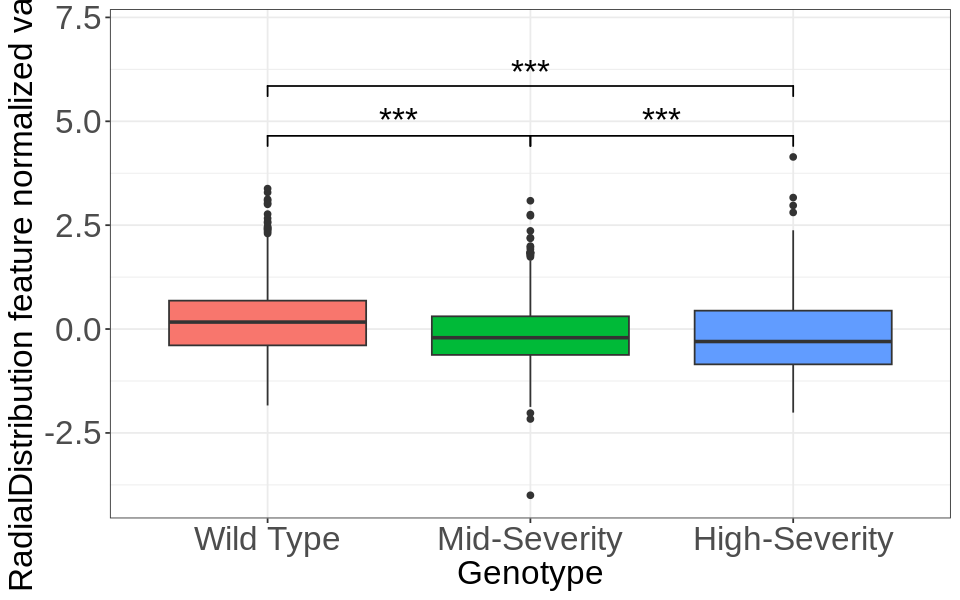

In [16]:
WT_vs_high_significance <- levene_df_RadialDistribution %>% filter(group == "high_radial_v_wt_radial")
WT_vs_unsel_significance <- levene_df_RadialDistribution %>% filter(group == "unsel_radial_v_wt_radial")
unsel_vs_high_significance <- levene_df_RadialDistribution %>% filter(group == "high_radial_v_unsel_radial")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
# make genotype a factor
raw_features_df_long_RadialDistribution$Metadata_genotype <- factor(raw_features_df_long_RadialDistribution$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
max_plot_value <- max(raw_features_df_long_RadialDistribution$value)
min_plot_value <- min(raw_features_df_long_RadialDistribution$value)
RadialDistribution_boxplot <- (
    ggplot(raw_features_df_long_RadialDistribution, aes(x = Metadata_genotype, y = value, fill = Metadata_genotype)) 
        + geom_boxplot()
        + labs(x = "Genotype", y = "RadialDistribution feature normalized values", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.5)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_plot_value+0.1, max_plot_value+0.25)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_plot_value+1.3, max_plot_value+1.5)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(min_plot_value,max_plot_value+3)
    )
RadialDistribution_boxplot
ggsave(file="mean_aggregated_normalized_feature_value_boxplot_across_genotype_RadialDistribution.png", plot=RadialDistribution_boxplot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)


## RadialDistribution mean variance plot

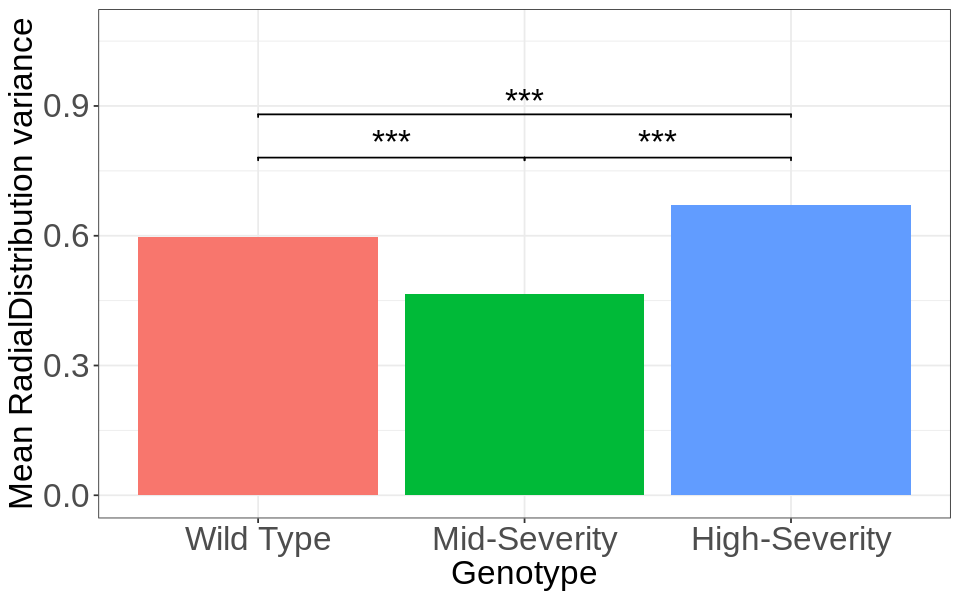

In [17]:
WT_vs_high_significance <- levene_df_RadialDistribution %>% filter(group == "high_radial_v_wt_radial")
WT_vs_unsel_significance <- levene_df_RadialDistribution %>% filter(group == "unsel_radial_v_wt_radial")
unsel_vs_high_significance <- levene_df_RadialDistribution %>% filter(group == "high_radial_v_unsel_radial")
WT_vs_high_significance <- WT_vs_high_significance$significance
WT_vs_unsel_significance <- WT_vs_unsel_significance$significance
unsel_vs_high_significance <- unsel_vs_high_significance$significance
# make genotype a factor
variance_stats_df_RadialDistribution$Metadata_genotype <- factor(variance_stats_df_RadialDistribution$Metadata_genotype, levels = c("Wild Type", "Mid-Severity", "High-Severity"))
width <- 8
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# get the max value of the variance
max_var <- max(variance_stats_df_RadialDistribution$variance_mean)
# add 0.3 to the max value to get the y max
max_var_plot <- max_var + 0.4
RadialDistribution_plot <- (
        ggplot(variance_stats_df_RadialDistribution, aes(x = Metadata_genotype, y = variance_mean, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + labs(x = "Genotype", y = "Mean RadialDistribution variance", fill = "Genotype")
        # remove the x axis label
        + theme(
            axis.title.x=element_blank(), 
            axis.ticks.x = element_blank(),
            axis.text.x = element_blank()
        )
        + theme_bw()
        + figure_theme
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = unsel_vs_high_significance,
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)       
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unsel_significance, 
            textsize = 7,
            y_position = c(max_var+0.1, max_var+0.15)        
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            y_position = c(max_var+0.2, max_var+0.25)        

        )
        # # remove the legend
        + theme(legend.position = "none")
        + ylim(0,max_var_plot)
    )
RadialDistribution_plot
ggsave(file="mean_aggregated_variance_across_genotype_RadialDistribution.png", plot=RadialDistribution_plot, path= file.path(fig_path), dpi=600, width=width, height=height, units="in", limitsize = FALSE)